# <ins>Workshop 3</ins>: 

# Classification and Practical Example

* **Classification**: A supervised machine learning method where the model is trained to predict the label of given input data accurately. This session will focus on traditional machine learning techniques and their practical applications.

<img src="https://i.gifer.com/Ckp3.gif" width="500" height="315" alt="Description of the image">

**<ins>Material generated by:</ins>** 
- Martina Cádiz Leyton
- Daniel Moreno Cartagena<br>

*Date: 06-12-2024*

---
---

This workshop will explore a variety of traditional classification algorithms.

<ins>**Classification Techniques**</ins>

* **Binary and Multiclass Classification**: Dive into key techniques such as logistic regression, decision trees, and support vector machines (SVM). Discuss the different challenges and approaches for binary versus multiclass classification scenarios.

<ins>**Results Visualization**</ins>

* **Confusion Matrix**: Gain a clear understanding of model performance with confusion matrices, which visualize the accuracy of predictions by comparing the predicted labels with the true labels. This matrix is especially useful for identifying misclassifications and assessing the effectiveness of binary and multiclass classification models.


<ins>**Library for Classification using Machine Learning Algorithms**</ins>

* **Scikit-learn**: A versatile and widely-used library for machine learning in Python. It provides efficient tools for a wide range of data mining and analysis tasks, including classification with logistic regression, decision trees, and SVMs.


# Classification

We have a Supervised Machine Learning Problem: Heart Failure Prediction

**Context**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great he.lp



In [89]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [112]:
df=pd.read_csv("./heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# The Attributes include:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [113]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
565,61,M,ASY,141,292,0,ST,115,Y,1.7,Flat,1


# Exploratory Data Analysis

<img src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

## Why do we need this ??



In [91]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [115]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [58]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

string_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

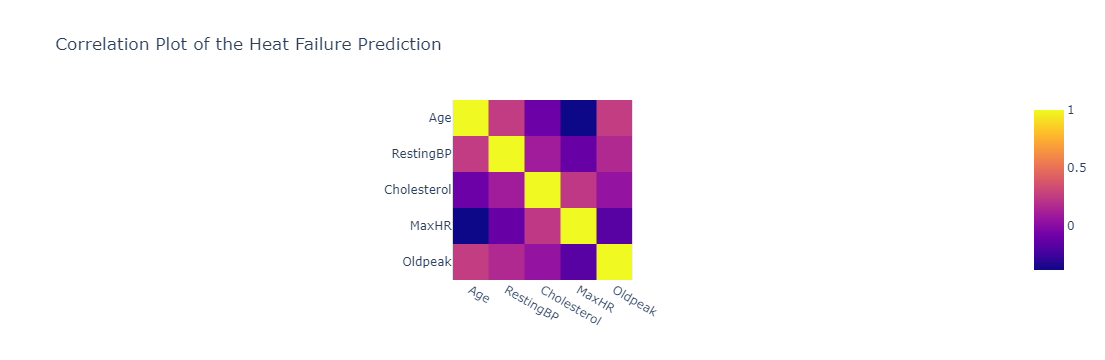

In [59]:
df_cor = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
df_cor
px.imshow(df_cor.corr(),title="Correlation Plot of the Heat Failure Prediction")

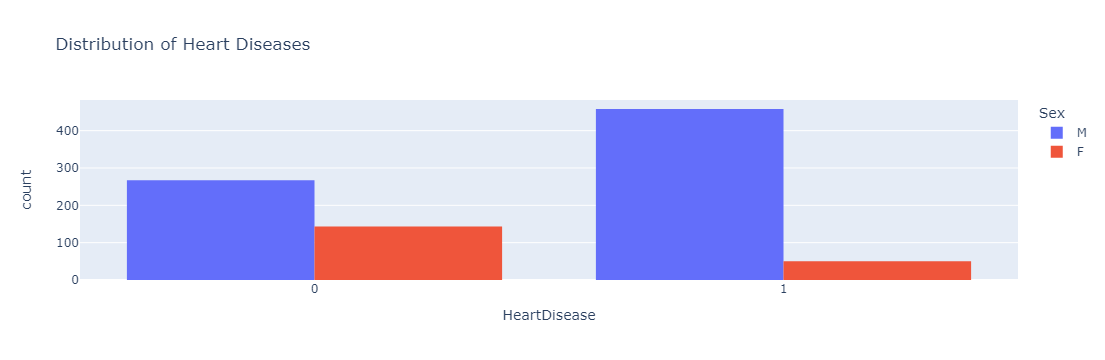

In [57]:

# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

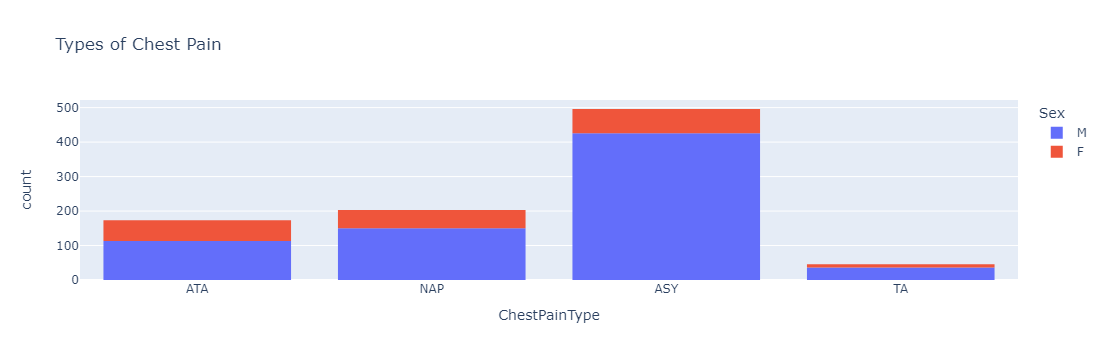

In [21]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

### One-hot encoding (categorical vector)

<img src="https://media.giphy.com/media/zMukICnMEZmSf8zvXd/giphy.gif">

Most of the algorithms need to transform **categorical** variables into **numbers**. Otherwise, the optimization method does not work. 

<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png">

The **one-encoding** is a technique to codify categorical variables into binary indicators.

In [22]:
from sklearn.preprocessing import OneHotEncoder


In [33]:
encoder = OneHotEncoder(sparse_output=False)

In [34]:
encoded_data = encoder.fit_transform(df[string_col])

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [35]:
columns = encoder.get_feature_names_out(string_col)

array(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'], dtype=object)

In [37]:
# Create column names based on the unique categories
columns = encoder.get_feature_names_out(string_col)
encoded_df = pd.DataFrame(encoded_data, columns=columns)

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
df_non_categorical = df.drop(string_col, axis=1)
final_df = pd.concat([df_non_categorical, encoded_df], axis=1)

### Training and testing subsets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = final_df.drop('HeartDisease', axis=1)  # Features
y = final_df['HeartDisease']  # Target variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                  y, 
                                  test_size=0.2, 
                                  random_state=42) 

### Using [logistic regression (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression)

### Hyperparameters of Logistic Regression

1. **`penalty`**:
   - Specifies the norm used in the penalization. Common options include `'l1'`, `'l2'`, `'elasticnet'`, and `'none'`.
   - **`'l1'`**: Lasso regression
   - **`'l2'`**: Ridge regression (default)
   - **`'elasticnet'`**: Combination of L1 and L2
   - **`'none'`**: No regularization

2. **`C`**:
   - Inverse of regularization strength; smaller values specify stronger regularization.
   - Default is 1.0.

3. **`solver`**:
   - Algorithm to use in the optimization problem.
   - Options: `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'`.
   - **`'liblinear'`** is good for small datasets, but it only handles L1 penalty.
   - **`'saga'`** supports elastic-net.

4. **`max_iter`**:
   - Maximum number of iterations taken for the solvers to converge.
t5class problem directly.

6. **`class_weight`**:
   - Weights associated with classes. If not given, all classes are supposed to have weight one.
   - Can be a dictionary of classes or `'balanced'` to automatically adjust weights inversely propo differ only in their regularization.


In [74]:
from sklearn.linear_model import LogisticRegression

Labels must be a **1d array** when using `LogisticRegression`. Then, we can use [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to transform the `one-hot encoding`$\in \mathbb{Z}^C, C>1$ in a single dimension array.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">


In [44]:
print('X shape', X_train.shape)
print('y shape', y_train.shape)

X shape (734, 20)
y shape (734,)


In [77]:
model =  LogisticRegression()

model.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
# Create a pipeline that includes scaling and the model

In [76]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

The `LogisticRegression` class also provides a method to get the probabilities for each class

In [69]:
y_pred_probs = model.predict_proba(X_test)

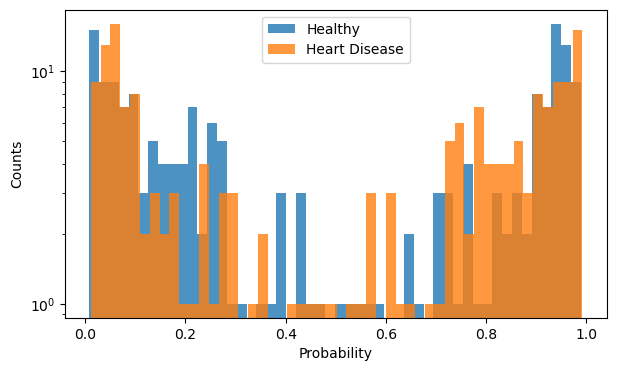

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.hist(y_pred_probs[:, 0], bins=50, label='Healthy', alpha=0.8)
plt.hist(y_pred_probs[:, 1], bins=50, label='Heart Disease', alpha=0.8)
plt.ylabel('Counts')
plt.xlabel('Probability')
plt.yscale('log')
plt.legend()
plt.show()

### Evaluate your model

In [79]:
from sklearn.metrics import accuracy_score, f1_score

In [80]:
acc_value = accuracy_score(y_test, y_pred)
f1_value = f1_score(y_test, y_pred, average='macro')

'Accuracy: {:.2f} \n F1 Score: {:.2f}'.format(acc_value, f1_value)

'Accuracy: 0.85 \n F1 Score: 0.85'

<img src="https://cdn.botpenguin.com/assets/website/Confusion_Matrix_77fb2e87bc.webp" width=500, height=200>


In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[0.87012987, 0.12987013],
       [0.1588785 , 0.8411215 ]])

In [89]:
import seaborn as sns
def plot_cm(cm, ax, title='CM', fontsize=15, cbar=False, yticklabels=True, class_names=None):
    '''
    Plot Confusion Matrix
    '''
    labels = np.zeros_like(cm, dtype=object)
    mask = np.ones_like(cm, dtype=bool)
    for (row, col), value in np.ndenumerate(cm):
        if value != 0.0:
            mask[row][col] = False
        if value < 0.01:
            labels[row][col] = '< 1%'
        else:
            labels[row][col] = '{:2.1f}%'.format(value*100)

    ax = sns.heatmap(cm, annot = labels, fmt = '',
                     annot_kws={"size": fontsize},
                     cbar=cbar,
                     ax=ax,
                     linecolor='white',
                     linewidths=1,
                     vmin=0, vmax=1,
                     cmap='Blues',
                     mask=mask,
                     yticklabels=yticklabels)

    try:
        if yticklabels and class_names is not None:
            ax.set_yticklabels(class_names, rotation=0, fontsize=fontsize+1)
            ax.set_xticklabels(class_names, rotation=90, fontsize=fontsize+1)
    except:
        pass
    ax.set_title(title, fontsize=fontsize+5)

    ax.axhline(y=0, color='k',linewidth=4)
    ax.axhline(y=cm.shape[1], color='k',linewidth=4)
    ax.axvline(x=0, color='k',linewidth=4)
    ax.axvline(x=cm.shape[0], color='k',linewidth=4)

    return ax

<Axes: title={'center': 'CM'}>

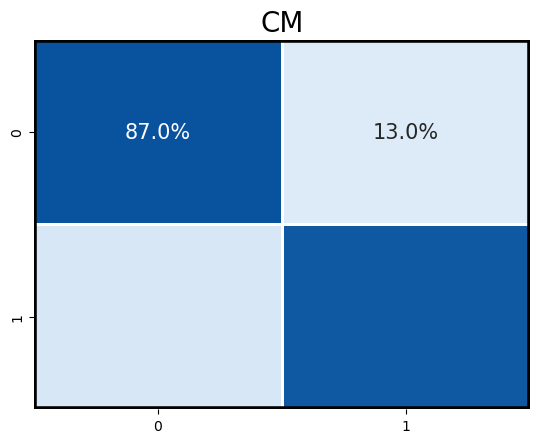

In [90]:
fig, ax = plt.subplots()

plot_cm(cm, ax)

Due to time constraints, model evaluation and optimization will be covered during the practical example.

# Practical Example: Assigning a Churn Risk Score to Enhance Customer Retention

In the competitive landscape of digital services, maintaining customer loyalty is crucial. High customer churn rates can significantly affect a business's sustainability and growth. This project aims to leverage machine learning techniques to analyze customer behavior and assign a churn risk score, facilitating proactive retention strategies.

Using a dataset that includes various customer attributes such as demographic details, website interaction patterns, and purchase history, this analysis will focus on predicting the likelihood of customers discontinuing service use. Each customer is assigned a churn score that ranges from 1 to 5, indicating the risk of churn at any given time.

<img src="https://www.rulex.ai/wp-content/uploads/2022/10/predicting-customer-churn-machinelearning.png" width="650" height="515" alt="Description of the image">

## Objectives

* **Understand Key Factors Influencing Churn**: Identify which features most significantly predict customer churn to focus retention efforts effectively.

* **Segment High-Risk Customers**: Pinpoint customer segments with higher churn scores to tailor specific engagement strategies.

* **Predict Customer Churn Scores**: Develop a predictive model that assigns a churn risk score based on customer data, aiding in early intervention.

* **Actionable Retention Strategies**: Use model insights to implement targeted actions designed to enhance customer loyalty and reduce churn rates.

## Brief Exploratory Data Analysis:

Every solution to a problem should include an EDA (Exploratory Data Analysis).

* What demographic factors (age, gender, location) are most associated with high churn scores?
* How does engagement (number of visits, duration on site) correlate with churn likelihood?
* Are there patterns in feedback or grievances that predict higher churn scores?
* What are the common characteristics of customers who have churn scores of 4 or 5?
* How do purchasing behaviors (frequency, volume, type of products) influence churn risk?

In [1]:
import pandas as pd

In [4]:
data_train = pd.read_csv('dataset/train.csv')
data_test = pd.read_csv('dataset/test.csv')

display(data_train.head())
display(data_test.head())

print(data_train.shape)
print(data_test.shape)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


(36992, 25)
(19919, 24)


In [5]:
data_train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
data_test.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [ ]:
# remove ID from train data
data_train.drop(['customer_id'], inplace=True, axis=1)